# COMBINE ONE OR MORE IMAGES HORIZONTALLY, SAVING THE RESULT INTO A NEW FILE

This notebook is just a PoC to know how to work with image files with _pillow_ (_PIL_) module.

## Modules and configuration

### Modules

In [69]:
from matplotlib import pyplot as plt

from PIL import Image

### Configuration

In [70]:
TEST_IMAGE = "./PG_subsample_RV_LSTperiod/LST_RANGE_OF_INTEREST_1000pts_PG_subsample_RV.jpg"
TEST_IMAGE_2 = "./PG_subsample_TESS_LSTperiod/LST_RANGE_OF_INTEREST_1000pts_PG_subsample_TESS.jpg"

IMG_FOLDER = "./img/" # Output image folder.

## Working with `Image` module

### Open image file

In [71]:
test_img = Image.open(TEST_IMAGE)

### Show image

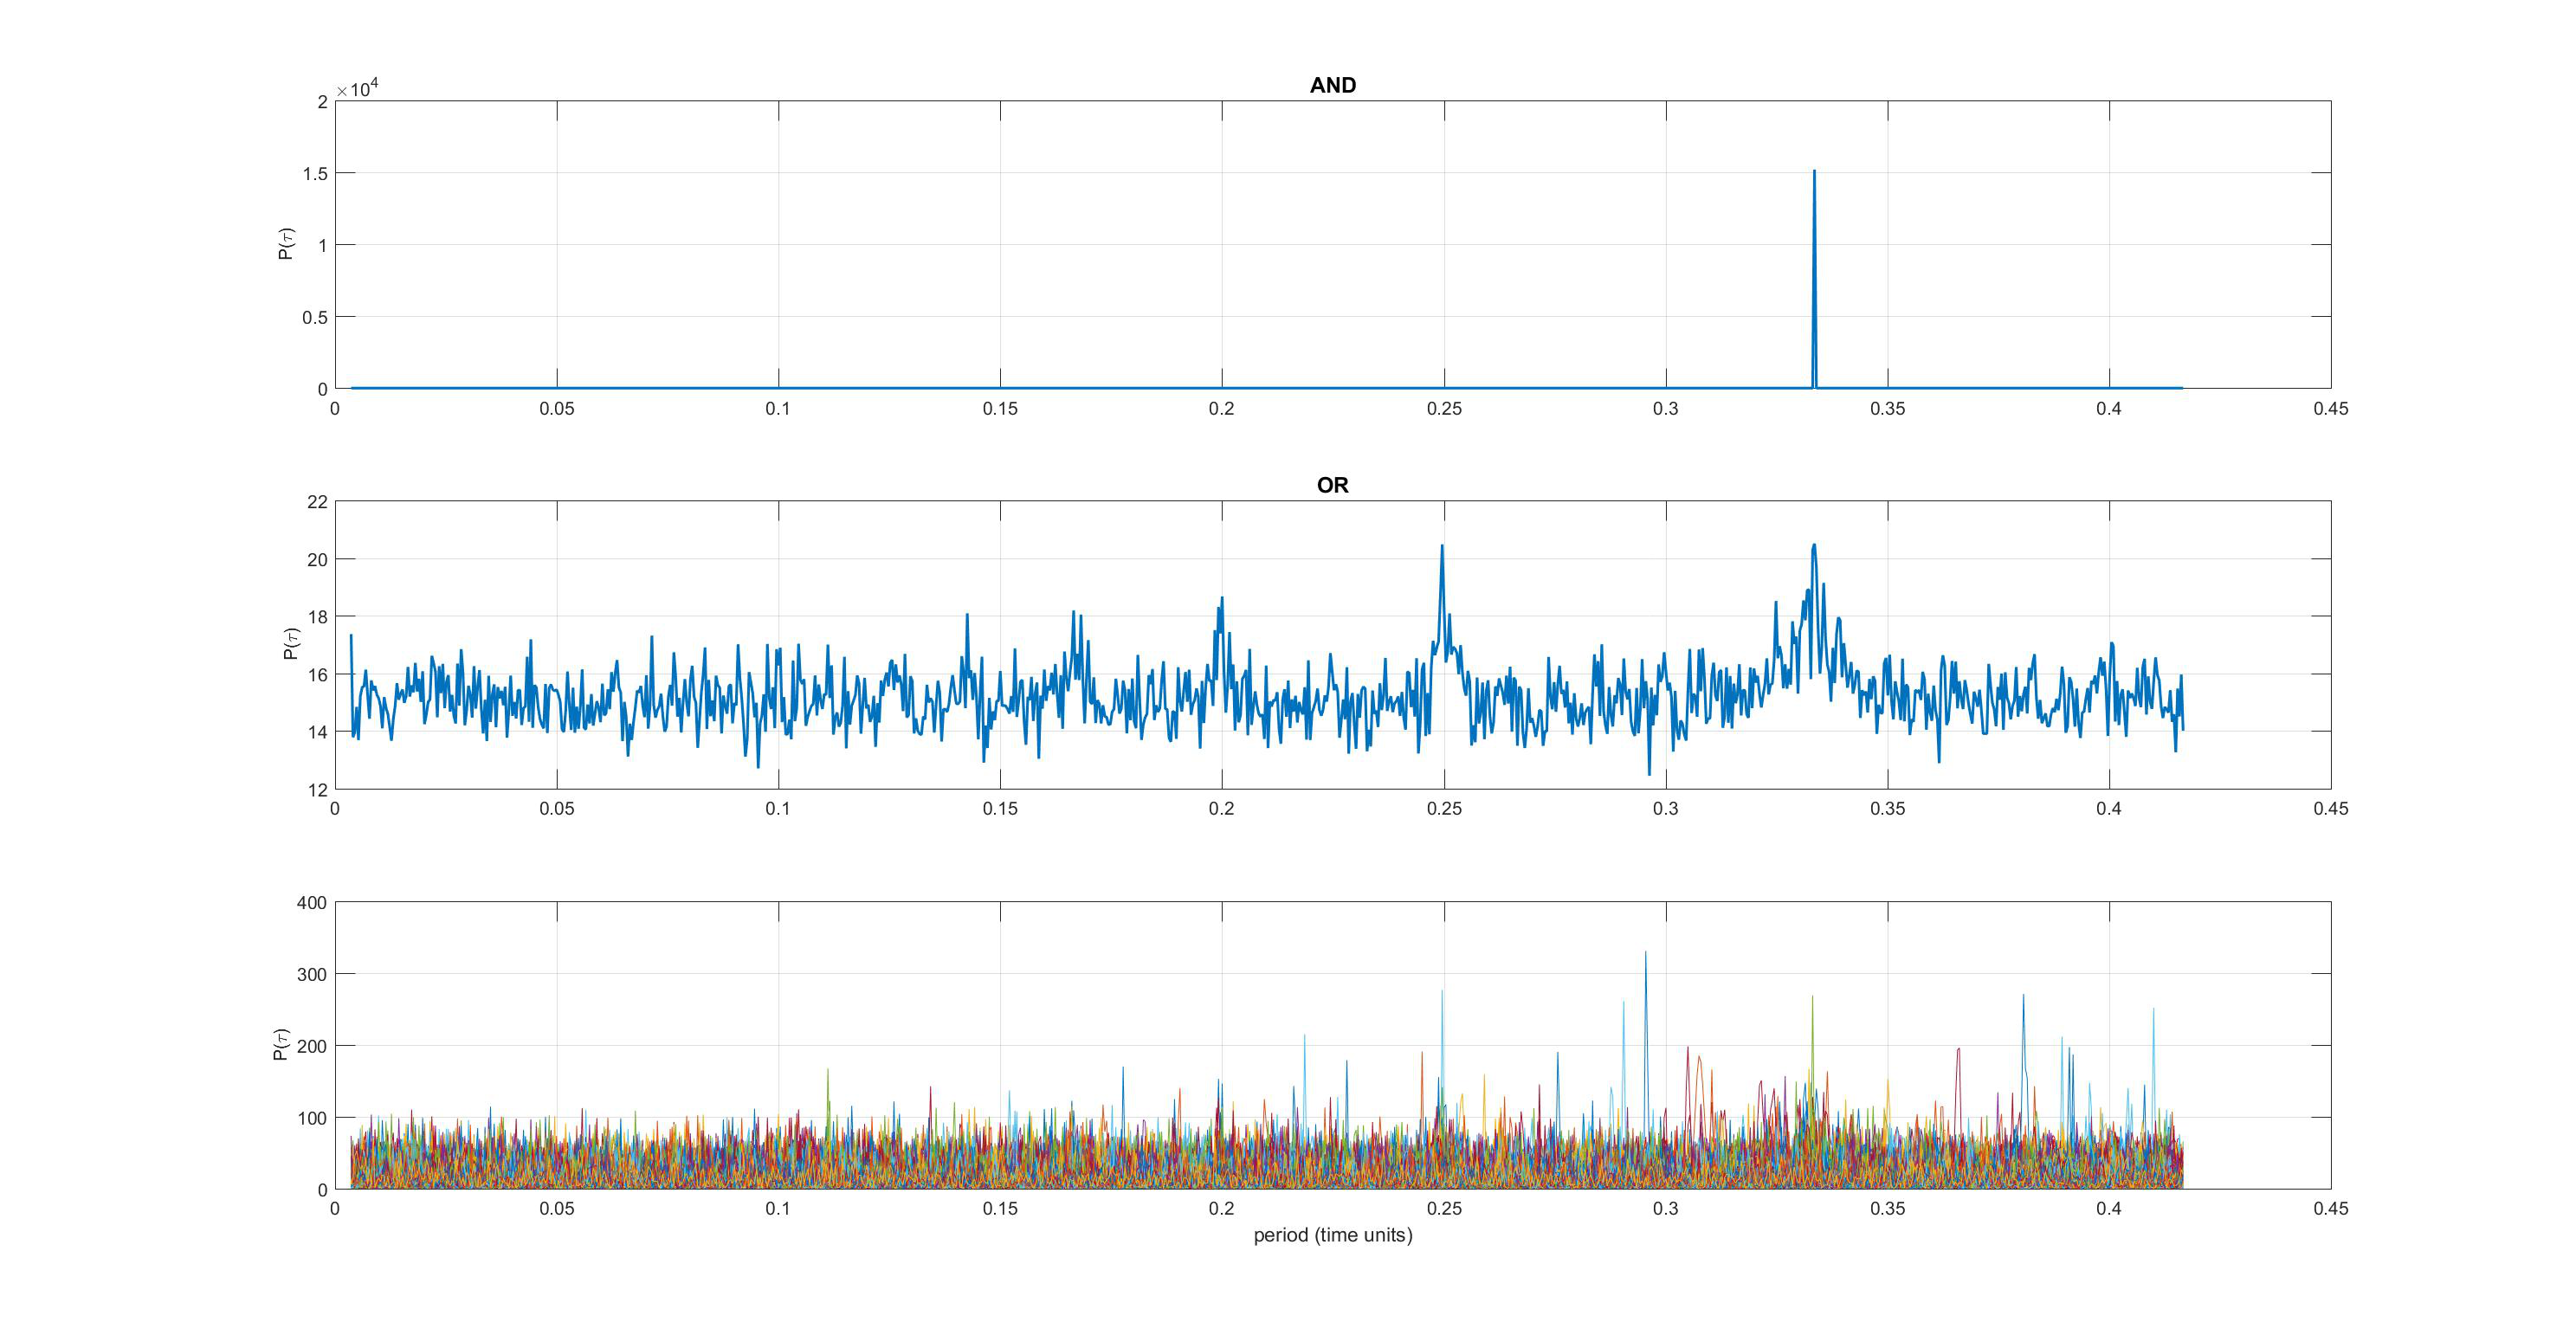

In [72]:
test_img

### Print image parameters

In [73]:
test_img.size

(2975, 1542)

### Get the size in variables

In [74]:
width = test_img.size[0]
height = test_img.size[1]
print("Image is %d pixels width by %d pixels high." %(width, height))

Image is 2975 pixels width by 1542 pixels high.


### Cropping the image to the center panel

We try to crop the image vertically, cutting from 1/3 to 2/3 its height, keeping the width unchanged.

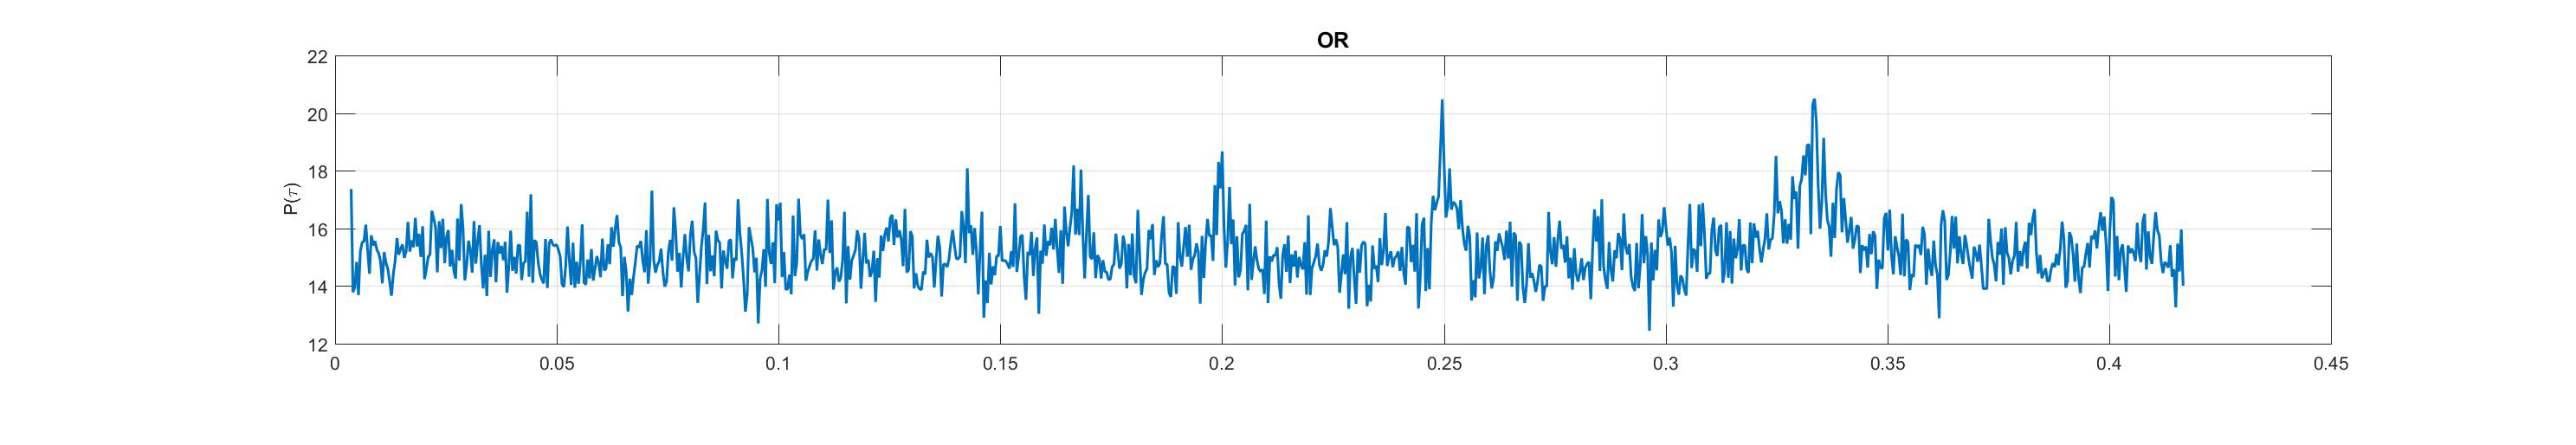

In [75]:
y_init = int(height / 3.0)
y_end = int(2.0 * height / 3.0)
crop_img = test_img.crop(box=(0, y_init, width, y_end))
crop_img

## Adding the image to a plot in `matplotlib`

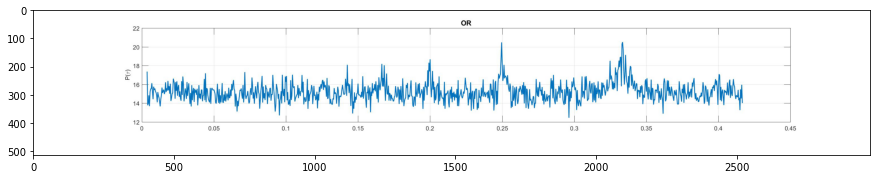

In [76]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.imshow(crop_img)


But we need to remove the border and axes:

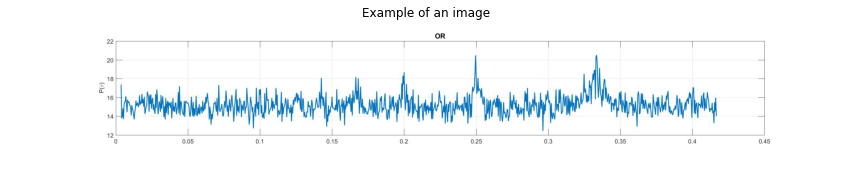

In [77]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
plt.axis('off')
plt.title("Example of an image")
ax.imshow(crop_img, interpolation=None)
plt.plot;


## Combining two images vertically

### Read and process both images

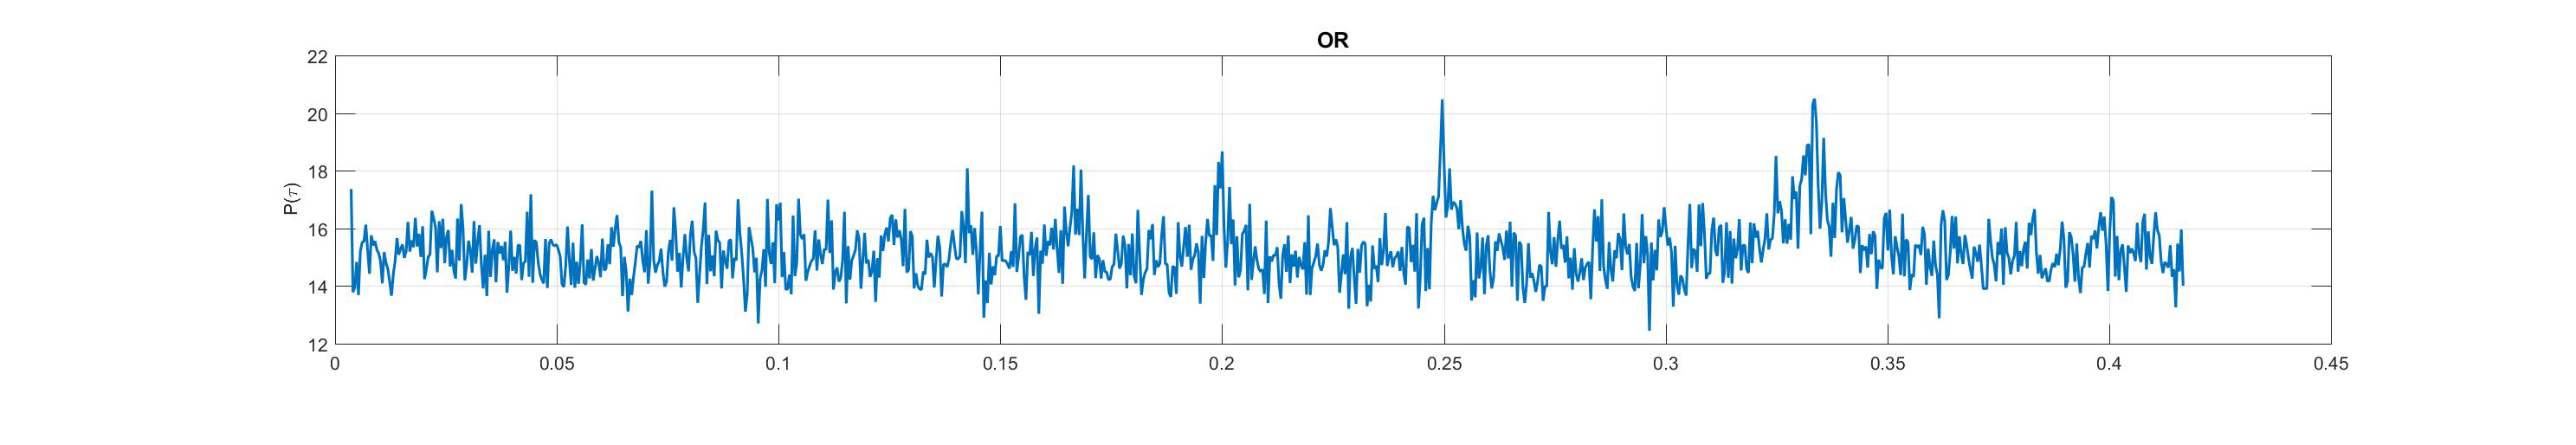

In [78]:
# Image 1:
im_1 = Image.open(TEST_IMAGE)
crop_img_1 = im_1.crop(box=(0, int(im_1.size[1] / 3.0),
                            im_1.size[0], int(2.0 * im_1.size[1] / 3.0)))
crop_img_1

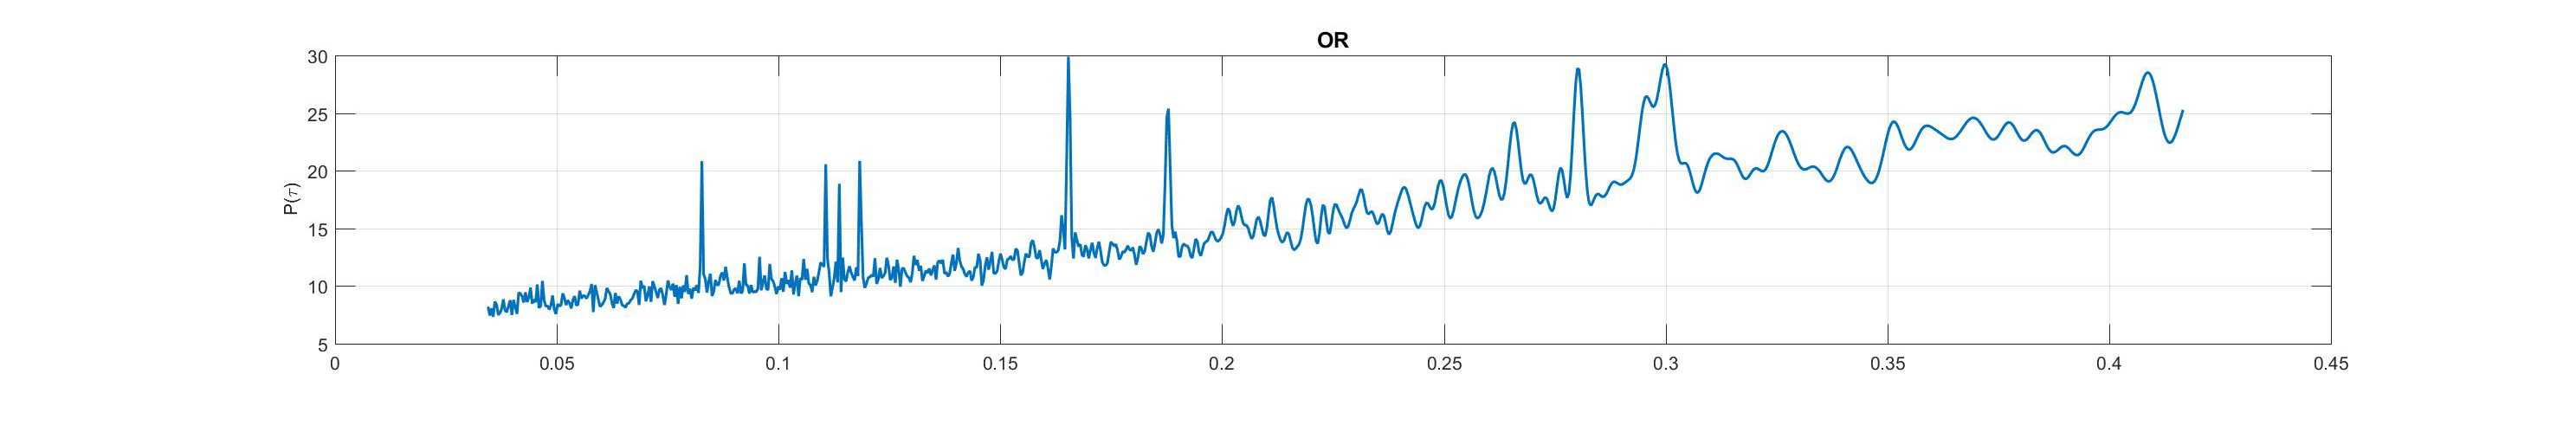

In [79]:
# Image 2:
im_2 = Image.open(TEST_IMAGE_2)
crop_img_2 = im_2.crop(box=(0, int(im_2.size[1] / 3.0),
                            im_2.size[0], int(2.0 * im_2.size[1] / 3.0)))
crop_img_2

### Combine both images with `matplotlib`

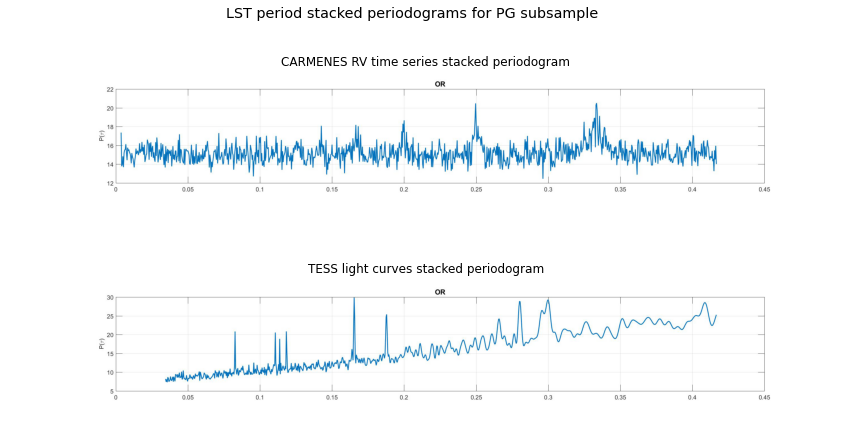

In [81]:
fig = plt.figure(figsize=(15,7))
ax_1 = plt.subplot(211)
ax_1.imshow(crop_img_1)
ax_1.set_title("CARMENES RV time series stacked periodogram", fontsize='large')
ax_1.axis('off')
ax_2 = plt.subplot(212)
ax_2.imshow(crop_img_2)
ax_2.set_title("TESS light curves stacked periodogram", fontsize='large')
ax_2.axis('off')
plt.suptitle("LST period stacked periodograms for PG subsample",fontsize='x-large')
plt.show();

Let's try a tight layout:

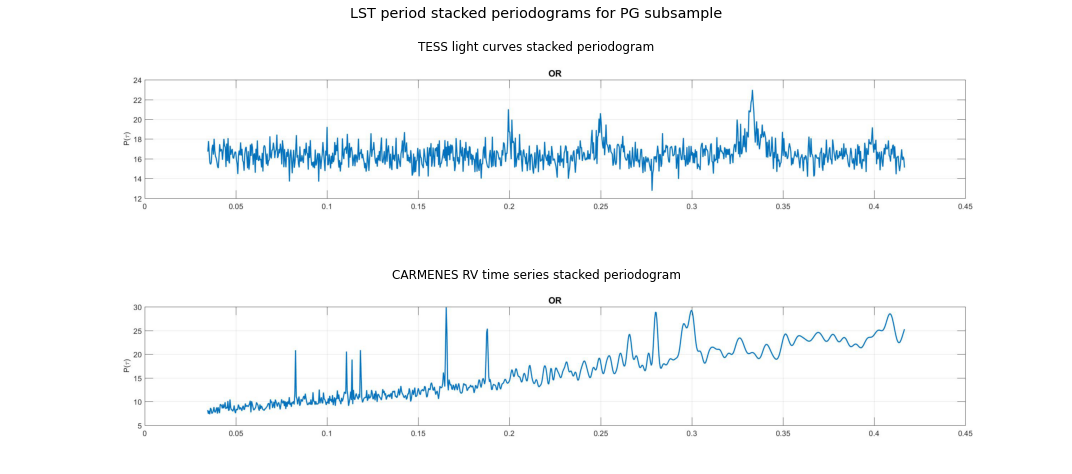

In [66]:
fig = plt.figure(figsize=(15,7))
ax_1 = plt.subplot(211)
ax_1.imshow(crop_img_1)
ax_1.set_title("TESS light curves stacked periodogram", fontsize='large')
ax_1.axis('off')
ax_2 = plt.subplot(212)
ax_2.imshow(crop_img_2)
ax_2.set_title("CARMENES RV time series stacked periodogram", fontsize='large')
ax_2.axis('off')
plt.suptitle("LST period stacked periodograms for PG subsample",fontsize='x-large')
plt.tight_layout()
plt.show();